In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
result = pd.read_csv('quic_offset_10ms.csv')

In [23]:
result.columns

Index(['quic', 'OFF_S'], dtype='object')

In [24]:
result["quic"] 

0      0.059305
1      0.011698
2      0.011238
3      0.010677
4      0.010846
         ...   
783    0.013706
784    0.013961
785    0.013996
786    0.014037
787    0.015658
Name: quic, Length: 788, dtype: float64

In [6]:
e= np.arange(0,80)

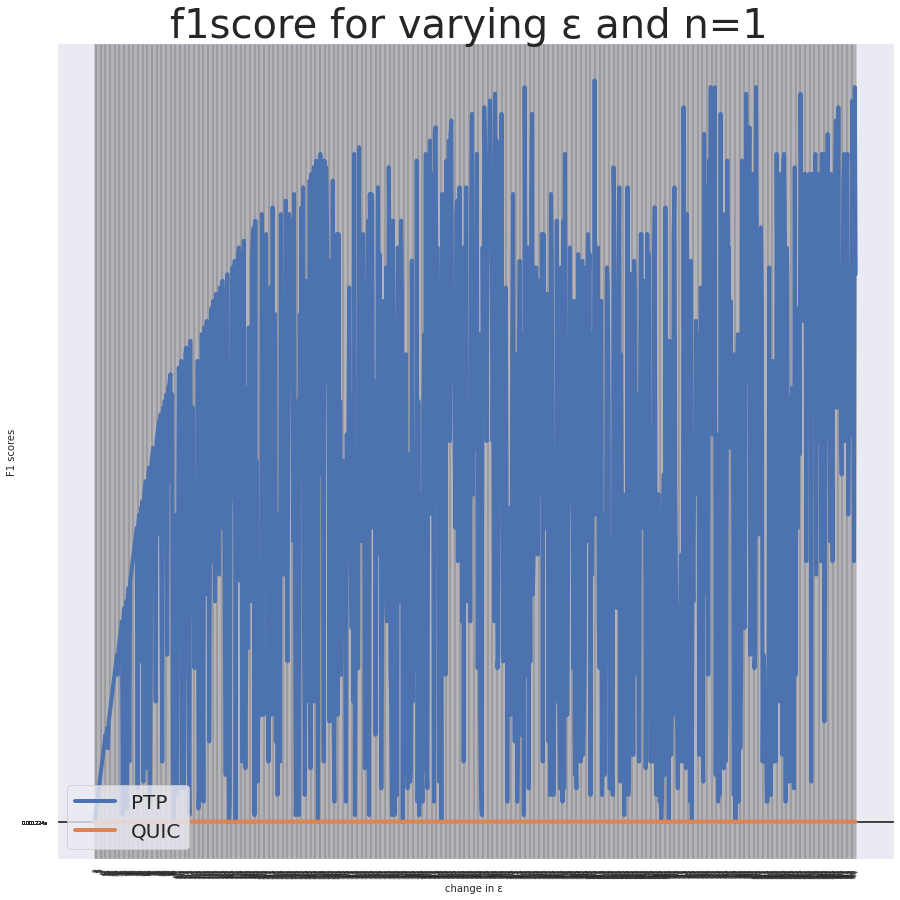

In [18]:
sns.set_theme()
plt.figure(figsize=(15,15))
plt.plot(e,result["OFF_S"],label="PTP",linewidth=4)
plt.plot(e,result["quic"],label="QUIC",linewidth=4)


plt.legend( fontsize=20,loc ="lower left")
plt.title("f1score for varying \u03B5 and n=1 ",fontsize=40)
plt.xlabel("change in \u03B5 ",fontsize=20)
plt.ylabel("F1 scores",fontsize=20)
plt.xticks(e,rotation=70,fontsize=5)
plt.yticks(np.arange(0.0001,0.001,0.0001),fontsize=5)
plt.grid(False,color='black', linestyle='-', linewidth=0.25)
#filename_fig = "All_Models_increasing_n_full_sum.png"
#plt.savefig(filename_fig,bbox_inches='tight')
plt.show()